# DATA SCIENCE PROJECT

**PROJECT TEAM ID**: PTID-CDS-JAN-25-2392  
**PROJECT CODE**   : PRCP-1017-AutoPricePred  
**PROJECT NAME**   : Automobile Imports Price Prediction

# Business Case

1. Summary
* The automobile industry faces challenges in accurately pricing vehicles due to fluctuating market trends, customer preferences, and vehicle specifications. 
* This project aims to develop a machine learning model that predicts car prices based on key factors like brand, engine size, horsepower, fuel type, and body style. The goal is to assist dealerships, manufacturers, and customers in making data-driven pricing decisions.

2. Business Problem
* Car pricing is influenced by multiple factors such as:

* Brand reputation (e.g., BMW vs. Toyota)
* Vehicle specifications (engine power, fuel efficiency)
* Market demand & depreciation rates
* Geographical pricing variations

3. Data Overview
The dataset consists of 200 car records with 26 attributes, including:

* Categorical Features: Brand, Fuel Type, Drive Type, Body Style
* Numerical Features: Engine Size, Horsepower, Wheelbase, Weight
* Target Variable: Car Price

4. Objectives
* Develop a data-driven pricing model using machine learning.
* Accurately predict car prices based on historical data.
* Identify key factors affecting price variation.
* Improve dealership profitability & enhance customer trust.

# Domain Analysis

## Industry Overview
The automobile industry is a multi-billion-dollar sector that includes vehicle manufacturing, sales, and aftermarket services. Accurate pricing is crucial for both manufacturers and dealerships to maintain profitability and remain competitive in the market.
### Categorical Features
1.  Car Manufacturer – Brand of the car (e.g., BMW, Audi).
2.  Fuel Type – Type of fuel used (gas/diesel).
3.  Aspiration – Engine air intake type (standard/turbo).
4.  Number of Doors – Typically two or four.
5.  Body Style – Sedan, hatchback, SUV, convertible, etc.
6.  Drive Wheels – Drivetrain configuration (FWD, RWD, 4WD).
7.  Engine Location – Position of the engine (front/rear).
8.  Engine Type – Classification (DOHC, OHC, rotor, etc.).
9.  Fuel System – Fuel delivery method (MPFI, SPFI, IDI, etc.).
10. Number of Cylinders – Cylinder count (two, four, six, etc.).
### Numerical Features
1.  Symboling – Insurance risk rating (-3 to +3).
2.  Normalized Losses – Adjusted financial loss per insurance claim.
3.  Wheelbase – Distance between front and rear axles.
4.  Vehicle Length – Total length of the car.
5.  Vehicle Width – Car’s widest point measurement.
6.  Vehicle Height – Car’s height from base to top.
7.  Curb Weight – Vehicle weight without passengers/cargo.
8.  Engine Displacement – Engine cylinder capacity.
9.  Cylinder Bore – Internal diameter of an engine cylinder.
10. Piston Stroke – Distance traveled by piston per cycle.
11. Compression Ratio – Cylinder’s max-to-min volume ratio.
12. Horsepower – Engine’s power output (BHP).
13. Peak RPM – Max engine rotational speed.
14. City MPG – Fuel efficiency in city driving.
15. Highway MPG – Fuel efficiency in highway driving.
16. Price (Target Variable) – Car’s market price (continuous numerical data).

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df= pd.read_csv('C:\\Users\\ssure\\OneDrive\\Desktop\\PRCP-1017-AutoPricePred\\Data\\auto_imports.csv')

In [3]:
len(df.columns)

26

In [4]:
# Assigning columns name
df.columns = ['symboling', 'normalized-losses', 'car-name', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
             'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
             'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Basic Checks

In [5]:
df.head()

,symboling,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
df.tail()

,symboling,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   car-name           200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

## Check statistics of data set

In [8]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [9]:
for i in df:
    if df[i].dtype =='O':
        print(df[i].value_counts())
        print('=============================')

normalized-losses
?      36
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64
car-name
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury

# EDA

In [10]:
# Continuous variables
numeric_data = df.select_dtypes(include=['int64', 'float64'])
# Categorical variables
categorical_data = df.select_dtypes(include=['object'])

In [11]:
numeric_data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450
4,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,15250


In [12]:
categorical_data.head()

,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
2,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500
3,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500
4,?,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500


In [13]:
len(categorical_data.columns)

15

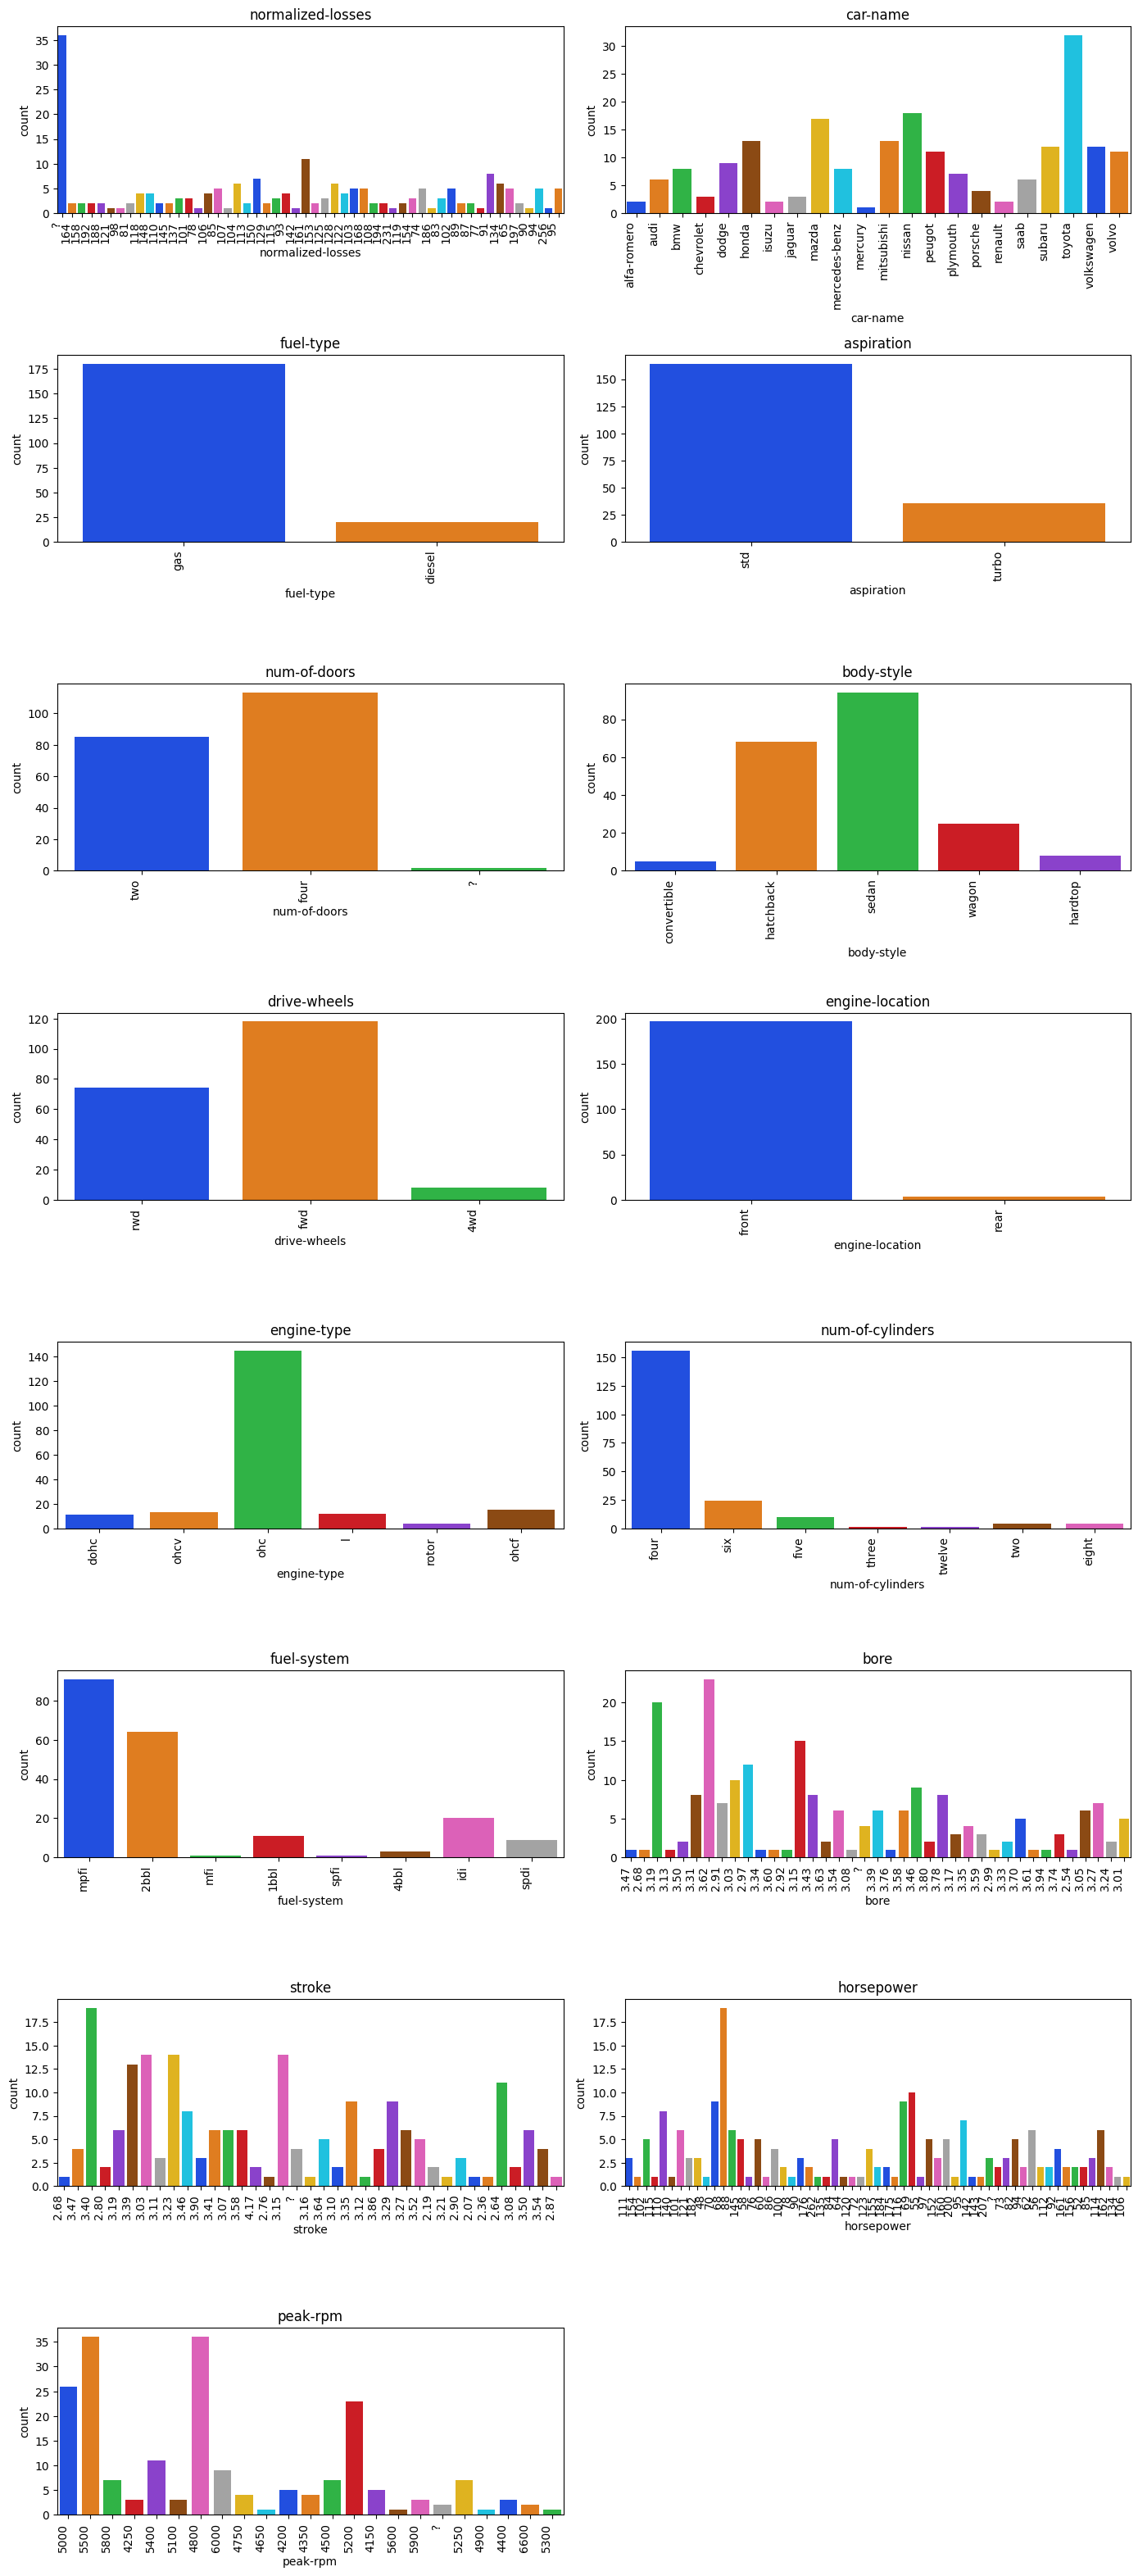

In [14]:
import math

# Total number of plots
n = len(categorical_data)

# Set number of columns
cols = 2

# Calculate rows needed
rows = math.ceil(n / cols)

plt.figure(figsize=(14, rows * 4))
plotnumber = 1

for i in categorical_data:
    plt.subplot(rows, cols, plotnumber)
    plt.xticks(rotation=90, ha='right')
    sns.countplot(x=categorical_data[i], palette='bright')
    plt.title(i)
    plotnumber += 1

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

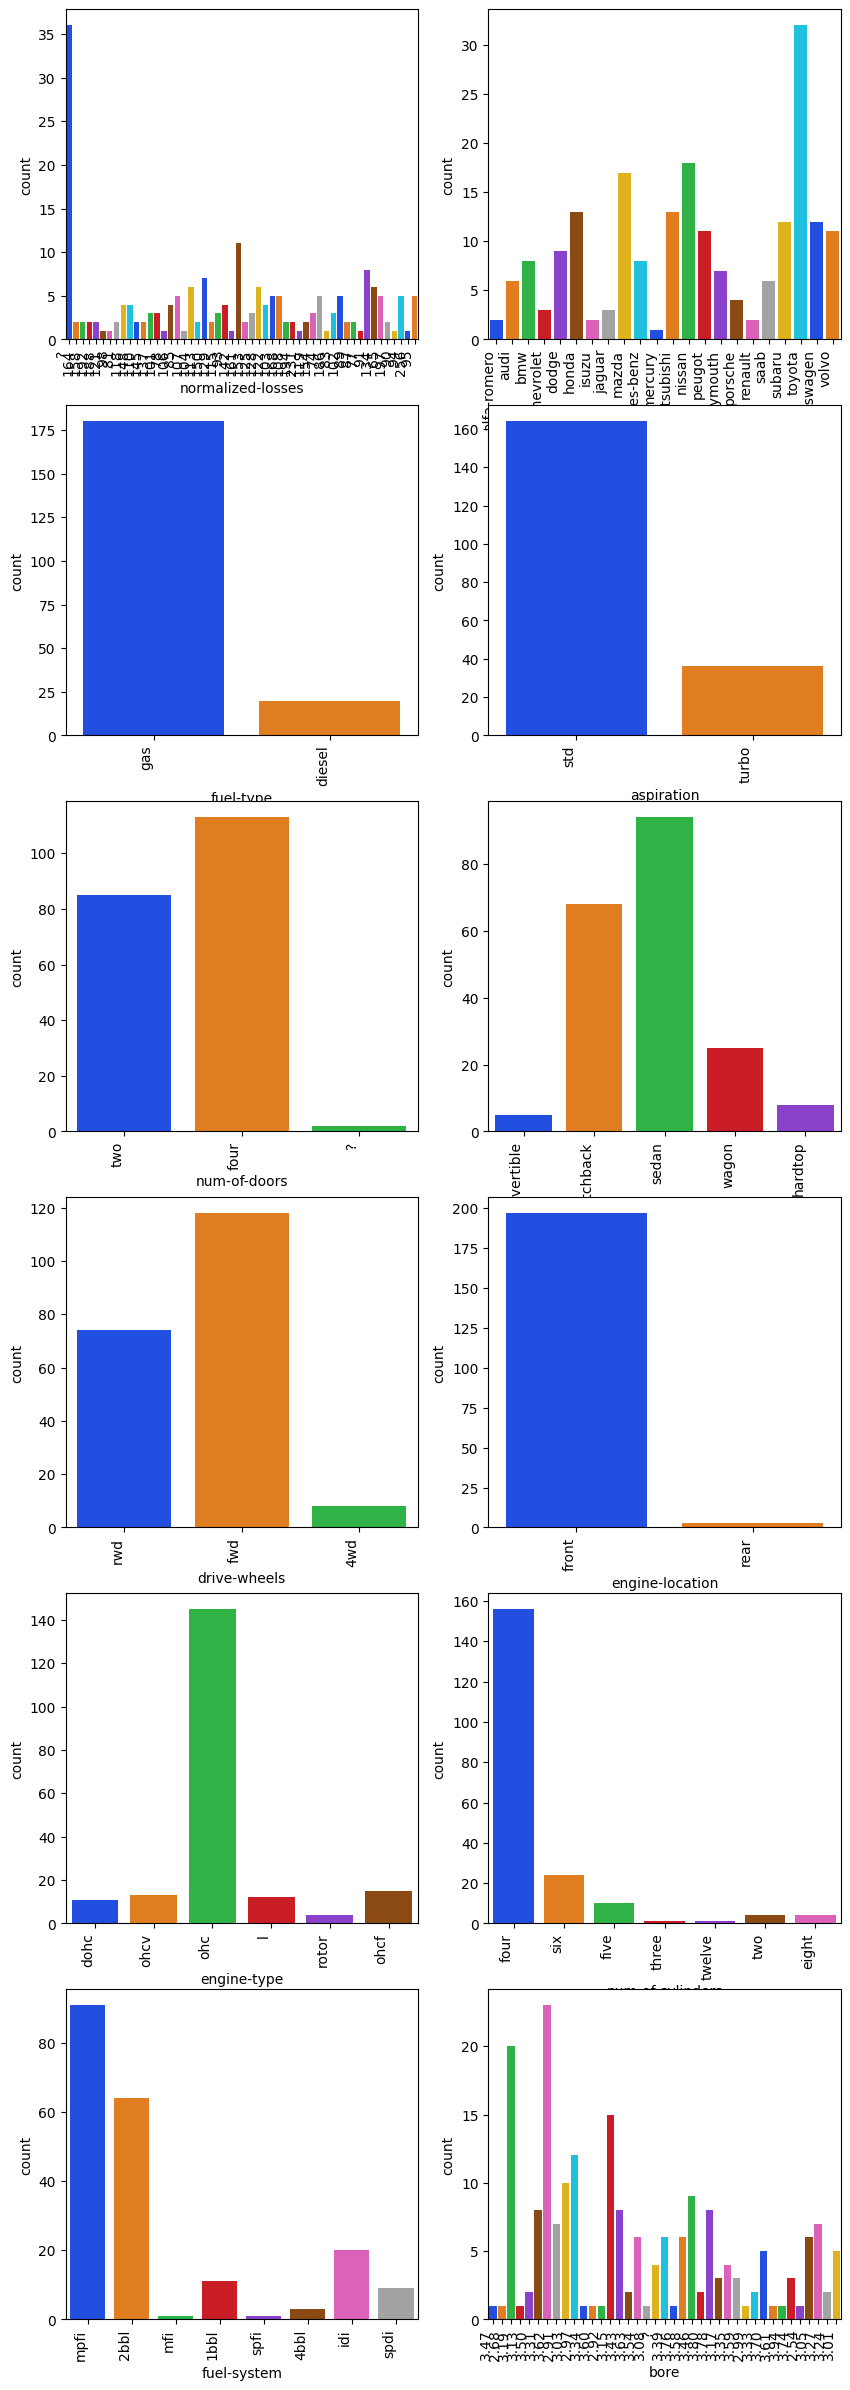

In [15]:
plt.figure(figsize = (10,30))
plotnumber = 1
for i in categorical_data:
    plt.subplot(6,2, plotnumber)
    plt.xticks(rotation =90, ha = 'right')
    sns.countplot(x = categorical_data[i], palette = 'bright')
    plotnumber = plotnumber +1
plt.tight_layout()

## Insights
### Price Distribution:
*Most cars fall within the $5,000 to $20,000 range.
*A few luxury or high-end vehicles go up to $45,000.
*The distribution is right-skewed, meaning fewer expensive cars.

## Horsepower Distribution:
*The majority of cars have 50-150 HP, with a peak around 100 HP.
*Some high-performance vehicles exceed 200 HP, but they are rare.

## Curb Weight Distribution:
*Most cars weigh between 2,000 to 3,000 lbs.
*A few heavier cars exceed 3,500 lbs.

## City MPG Distribution:
*Most cars achieve 15-30 MPG in the city.
*Some fuel-efficient models exceed 40 MPG.
*The distribution suggests a mix of standard and eco-friendly vehicles.

In [ ]:
len(numeric_data.columns)

16

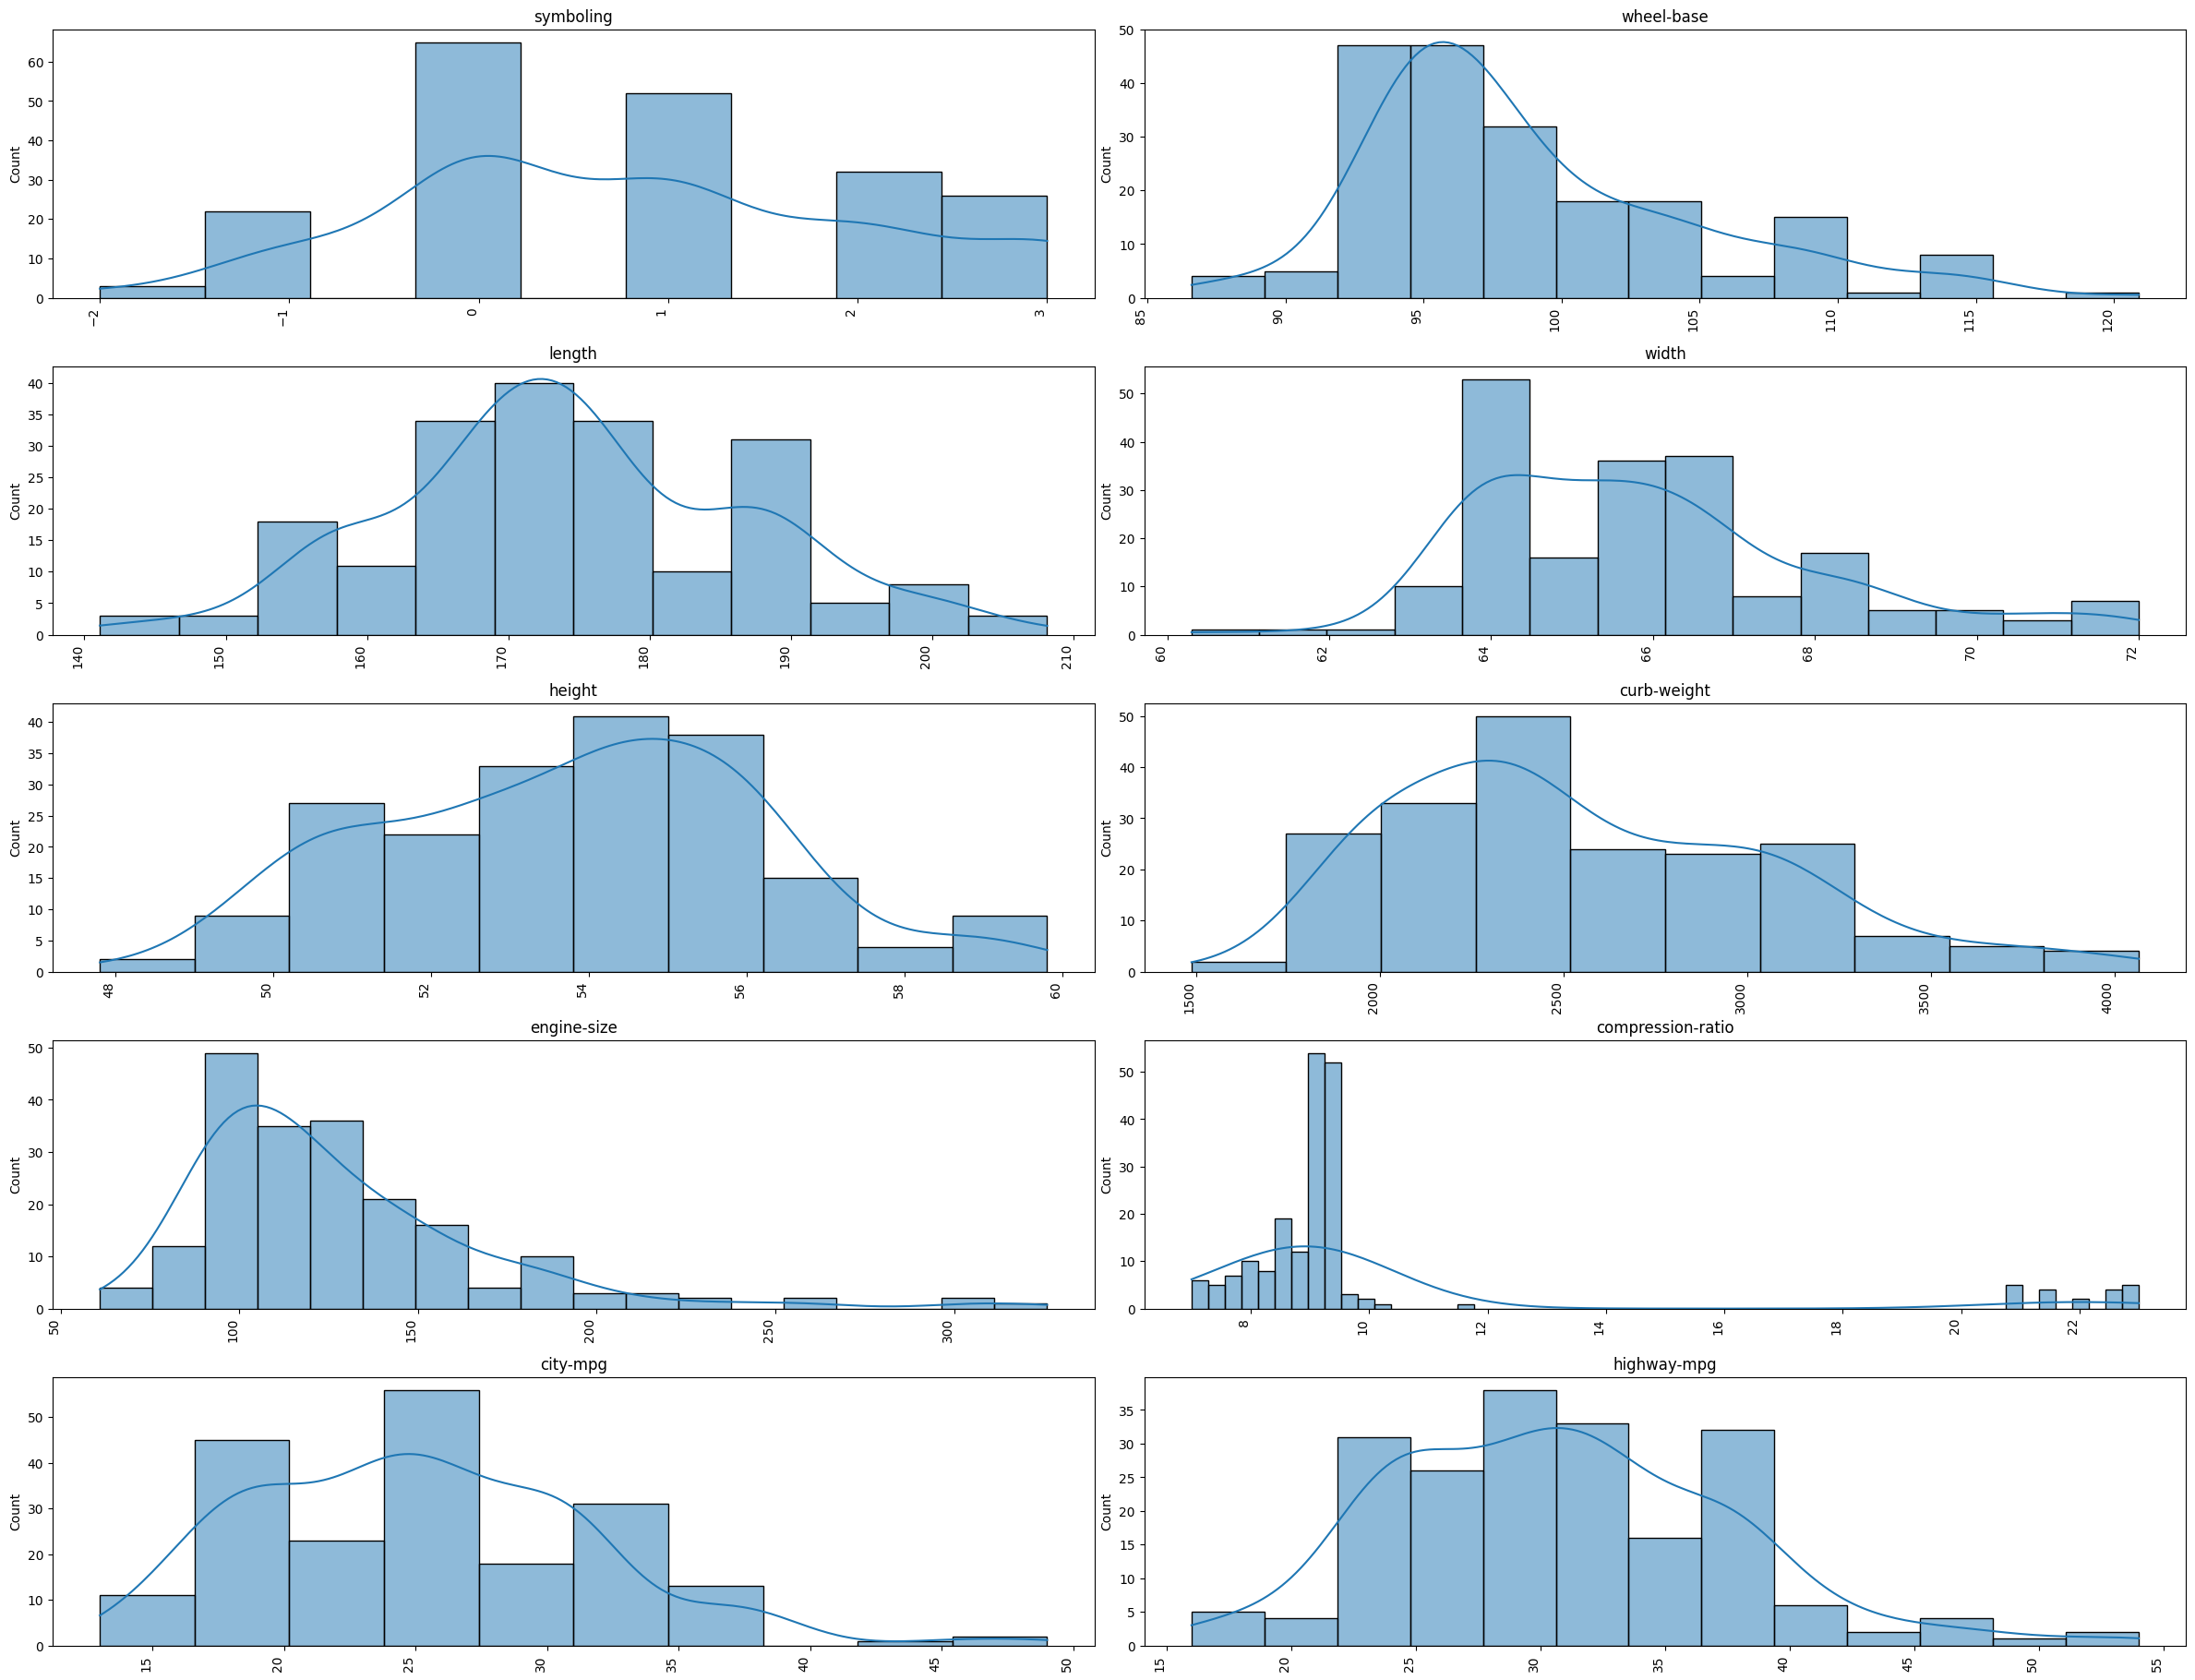

In [16]:
plt.figure(figsize=(24, 30))
plotnumber = 1

for column in numeric_data.drop('price', axis=1):  
    plt.subplot(8, 2, plotnumber)
    sns.histplot(x=numeric_data[column], kde=True)
    plt.title(column)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel("")
    plt.tight_layout(rect=[0, 0, 1, 0.97], pad=1.5, w_pad=0.5, h_pad=0.5)
    plotnumber += 1 

plt.show()

## Insights 
### Wheelbase :
Ranges from 86.6 to 120.9, with an average of 98.85.
### Length :
* Varies between 141.1 and 208.1, with a mean of 174.2.
### Width :
*Typically between 60.3 and 72.0, averaging 65.9.
### Curb Weight :
* Heaviest car is 4066 lbs, lightest is 1488 lbs, with an average of 2555 lbs.
### Engine Size :
*Varies significantly, with a mean of 126.9 cc and a max of 326 cc.
### Horsepower : 
*Average is 103 HP, ranging from 48 to 262 HP.
### RPM : 
*Most engines peak around 5200 RPM, but range from 4150 to 6600 RPM.
### City MPG :
*Fuel efficiency ranges widely, from 13 to 49 MPG in the city and 16 to 54 MPG on the highway.
### Price : 
*Prices range from $5,118 to $45,400, with an average of $13,205.

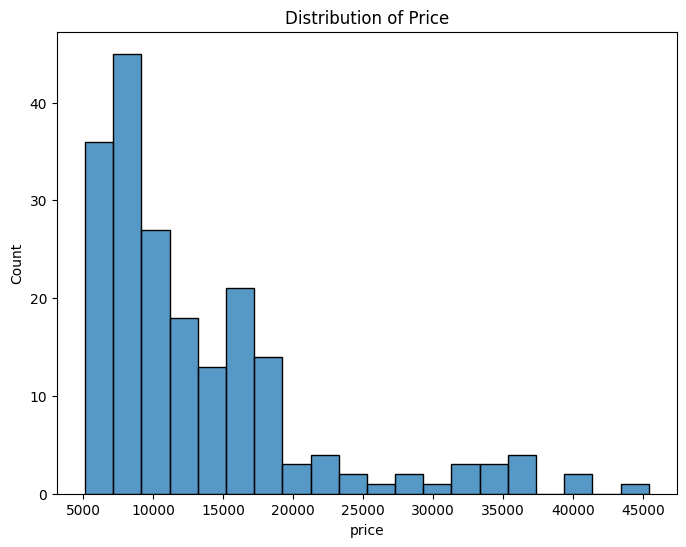

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20)
plt.title('Distribution of Price')
plt.show()

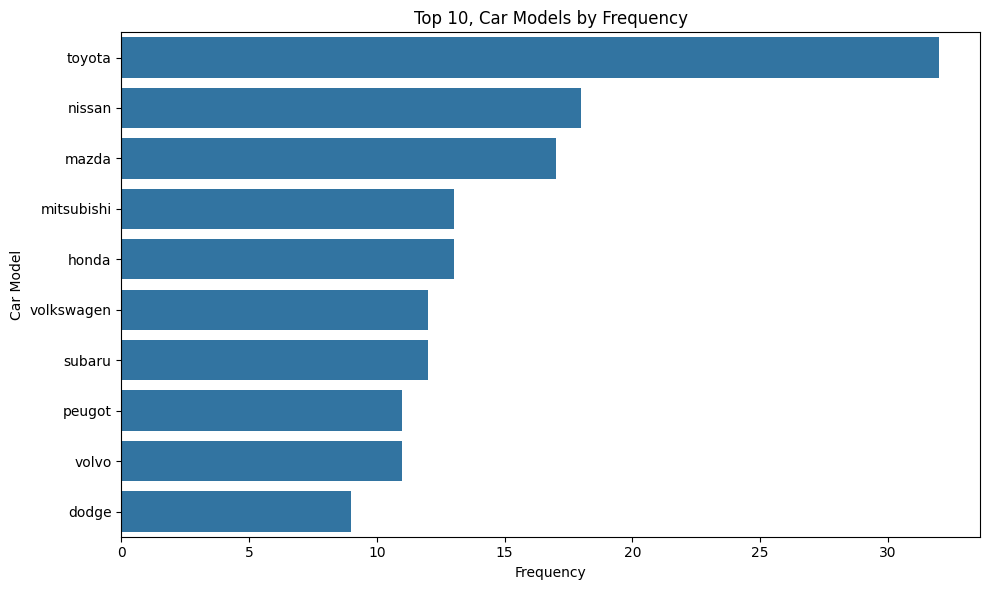

In [20]:
n = 10 # top 10 models
top_car_models = df['car-name'].value_counts().head(n)
plt.figure(figsize = (10,6))
sns.barplot(x = top_car_models.values, y = top_car_models.index)
plt.title(f'Top {n}, Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

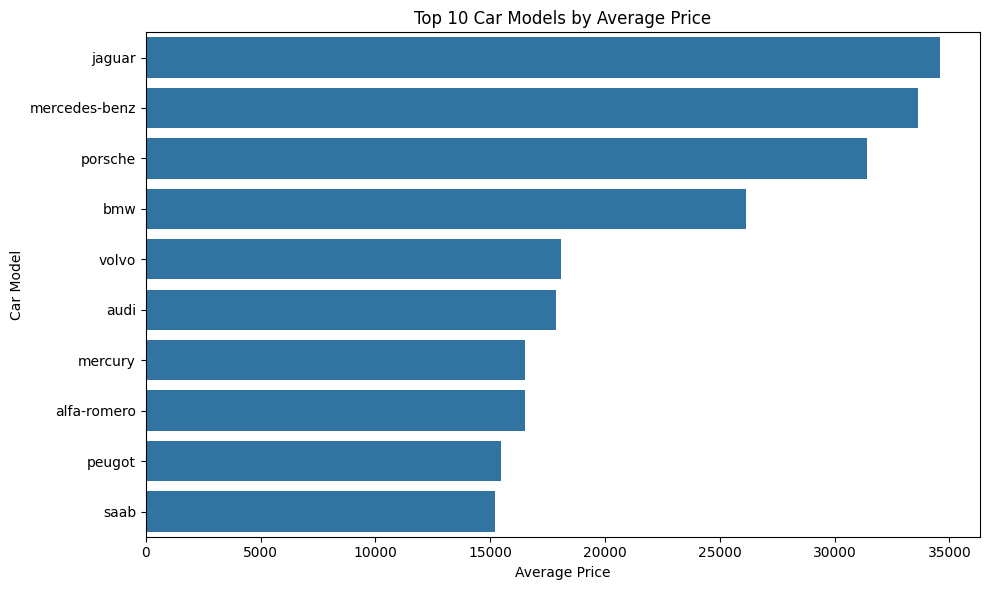

In [21]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('car-name')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 10   # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [22]:
len(categorical_data.columns)

15

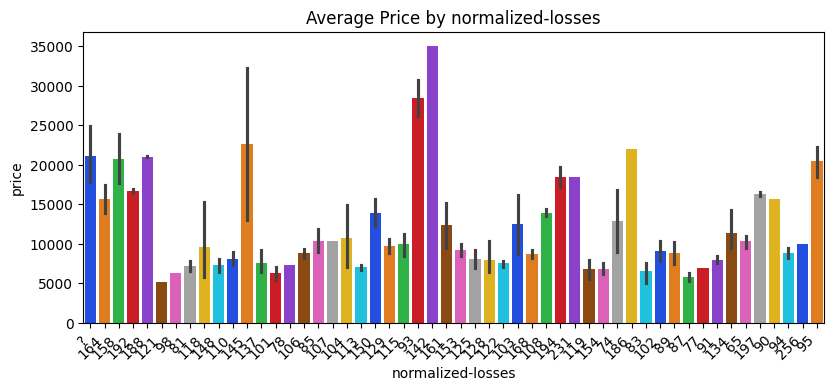

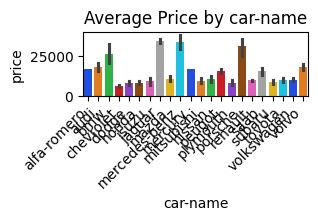

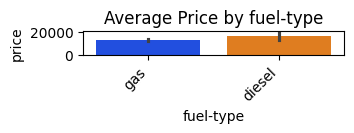

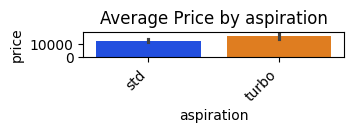

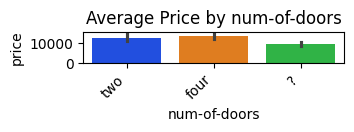

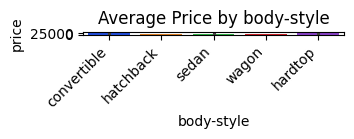

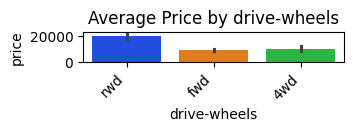

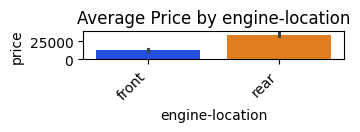

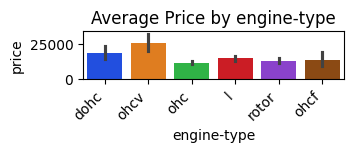

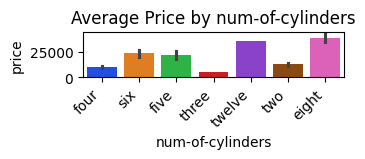

ValueError: num must be an integer with 1 <= num <= 10, not 11

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(16, 18))  # Adjust figure size as needed
n=1
for feature in categorical_data:
    plt.subplot(5,2,n)
    sns.barplot(x=feature, y='price', data=df, palette = 'bright')
    plt.title(f'Average Price by {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    n+=1
    plt.show()

## Insights
#### car-name :
* Luxury brands like Mercedes-Benz, Porsche, Jaguar, and BMW command higher average prices, while economy brands such as Chevrolet, Plymouth, Honda, and Subaru have lower prices.  Audi, Volvo, Toyota, Nissan, Mazda, and Mitsubishi fall into a mid-range price category.

### Fuel-type
* Diesel cars, on average, have a notably higher price compared to gas cars. This suggests that fuel type is a strong indicator of a car's price.

### Aspiration
* The bar plot clearly shows that cars with a turbo aspiration have a significantly higher average price compared to cars with a standard (std) aspiration.

### number of doors
* The bar plot indicates that, on average, cars with four doors tend to have slightly higher prices than cars with two doors.

### body - style
* Convertibles and hardtops tend to have the highest average prices, followed by sedans. Hatchbacks and wagons exhibit considerably lower average prices.

### drive-wheels
* The cars with rear-wheel drive (rwd) have the highest average price, followed by four-wheel drive (4wd) cars, while front-wheel drive (fwd) cars have the lowest average price.

### engine- location
* Cars with the engine located at the rear have a significantly higher average price compared to those with the engine in the front.

### engine-type
* The bar plot reveals price variations across different engine types. ohcv engines appear to be associated with the highest average prices, while ohc engines have the lowest. Other engine types (dohc, l, rotor, ohcf) fall within a middle range.

### num-of-cylinders
* Cars with eight and twelve cylinders exhibit significantly higher average prices, suggesting these engine configurations are associated with high-performance or luxury vehicles.  Three-cylinder engines have the lowest average price, likely found in smaller, more economical cars.  Four, five, and six-cylinder engines fall within a mid-range price category.

### fuel-system
*  Cars with MPFI (Multi-Point Fuel Injection) and IDI (Indirect Injection) systems tend to have the highest average prices, while 2BBL (2-Barrel Carburetor) systems are associated with the lowest.



In [ ]:
numerical_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight',
                      'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                      'peak-rpm', 'city-mpg', 'highway-mpg','price']

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
# Handling null values

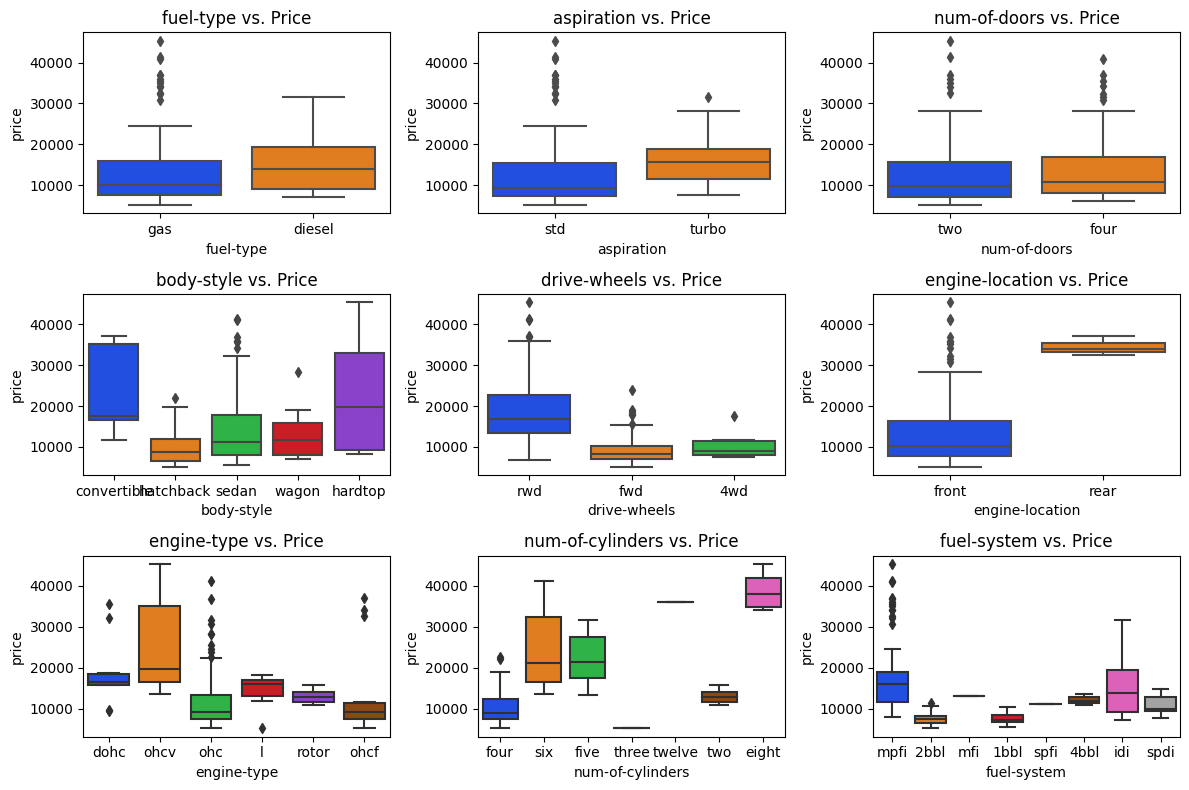

In [ ]:
categorical_columns = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
                       'engine-location', 'engine-type', 'num-of-cylinders','fuel-system']
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price',palette='bright')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
car-name             0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df['normalized-losses'].isnull().sum()

0

In [ ]:
np.mean(df['normalized-losses'])

122.0

In [ ]:
df.loc[df['normalized-losses'].isnull(), 'normalized-losses'] = 122.0

In [ ]:
df['num-of-doors'].isnull().sum()

0

In [ ]:
df['num-of-doors'].value_counts()

num-of-doors
four    115
two      85
Name: count, dtype: int64

In [ ]:
df.loc[df['num-of-doors'].isnull(), 'num-of-doors'] = 'four'

In [ ]:
df['bore'].isnull().sum()

0

In [ ]:
np.mean(df['bore'])

3.33

In [ ]:
df.loc[df['bore'].isnull(), 'bore'] = np.mean(df['bore'])

In [ ]:
df['stroke'].isnull().sum()

0

In [ ]:
np.mean(df['stroke'])

3.25984693877551

In [ ]:
df.loc[df['stroke'].isnull(), 'stroke'] = np.mean(df['stroke'])

In [ ]:
df['horsepower'].isnull().sum()

0

In [ ]:
np.mean(df['horsepower'])

103.35858585858587

In [ ]:
df.loc[df['horsepower'].isnull(), 'horsepower'] = np.mean(df['horsepower'])

In [ ]:
np.mean(df['peak-rpm'])      

5118.181818181818

In [ ]:
df.loc[df['peak-rpm'].isnull(), 'peak-rpm'] = np.mean(df['peak-rpm'])

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
car-name             0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
import pandas as pd

# Save the cleaned dataset as a new CSV file
df.to_csv("clean_auto_imports.csv", index=False)

# OR save it as an Excel file
df.to_excel("clean_auto_imports.xlsx", index=False)


In [ ]:
df_cleaned = pd.read_csv("clean_auto_imports.csv")
df_cleaned.head()  # Preview the first 5 rows


,symboling,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,0,2,0.075578,5,0.522603,-1.850239,-0.292224,0.204525,-0.247221,-0.654574,-0.544042,9.711176
1,1,122.0,0,1,0,1,2,2,0,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,4,3,0.605109,5,-2.426370,0.670579,-0.292224,1.355436,-0.247221,-0.966276,-0.690882,9.711176
2,2,164.0,1,1,0,0,3,1,0,0.158057,0.192591,0.143971,0.209918,-0.422785,2,2,-0.429882,5,-0.522603,0.447216,-0.042481,-0.036363,0.798715,-0.187021,-0.103522,9.543306
3,2,164.0,1,1,0,0,3,0,0,0.091646,0.192591,0.239316,0.209918,0.518648,2,1,0.219996,5,-0.522603,0.447216,-0.541967,0.311587,0.798715,-1.122127,-1.278241,9.767152
4,2,122.0,1,1,0,1,3,1,0,0.158057,0.249427,0.191644,-0.285464,-0.094153,2,1,0.219996,5,-0.522603,0.447216,-0.417096,0.177760,0.798715,-0.966276,-0.837722,9.632400


In [ ]:
label_encoder = LabelEncoder()
for column in categorical_data:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,symboling,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,122.0,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,2,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [ ]:
numeric = ['wheel-base', 'length', 'width', 'height', 'curb-weight',
                      'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                      'peak-rpm', 'city-mpg', 'highway-mpg']
scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])

In [ ]:
df.head()

,symboling,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,0,2,0.075578,5,0.522603,-1.850239,-0.292224,0.204525,-0.247221,-0.654574,-0.544042,16500
1,1,122.0,0,1,0,1,2,2,0,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,4,3,0.605109,5,-2.426370,0.670579,-0.292224,1.355436,-0.247221,-0.966276,-0.690882,16500
2,2,164.0,1,1,0,0,3,1,0,0.158057,0.192591,0.143971,0.209918,-0.422785,2,2,-0.429882,5,-0.522603,0.447216,-0.042481,-0.036363,0.798715,-0.187021,-0.103522,13950
3,2,164.0,1,1,0,0,3,0,0,0.091646,0.192591,0.239316,0.209918,0.518648,2,1,0.219996,5,-0.522603,0.447216,-0.541967,0.311587,0.798715,-1.122127,-1.278241,17450
4,2,122.0,1,1,0,1,3,1,0,0.158057,0.249427,0.191644,-0.285464,-0.094153,2,1,0.219996,5,-0.522603,0.447216,-0.417096,0.177760,0.798715,-0.966276,-0.837722,15250


- Here car prices range in thousands, a large MSE is expected
- If high-priced cars are rare, the model may struggle, leading to a high MSE.
- Here we use log transformation on price to reduce the effect of extreme values
- If features are not scaled, models like Linear Regression & KNN may struggle.

In [ ]:
df["price"] = np.log1p(df["price"])

In [ ]:
df = df[df["price"] < df["price"].quantile(0.95)]  # Remove top 5% high-priced cars

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["price"]))

# Machine Learning Approach

# Importing Libraries For Algorithms

1. Linear Regression
2. Random Forest Regressor
3. K-Nearest Neighbours(KNN) Regression
4. Extreme Gradient Boosting(XGBoost) Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Model Creation  

In [ ]:
# Define features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X.head()

,symboling,normalized-losses,car-name,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,0,1,0,1,0,2,0,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,0,2,0.075578,5,0.522603,-1.850239,-0.292224,0.204525,-0.247221,-0.654574,-0.544042
1,1,122.0,0,1,0,1,2,2,0,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,4,3,0.605109,5,-2.426370,0.670579,-0.292224,1.355436,-0.247221,-0.966276,-0.690882
2,2,164.0,1,1,0,0,3,1,0,0.158057,0.192591,0.143971,0.209918,-0.422785,2,2,-0.429882,5,-0.522603,0.447216,-0.042481,-0.036363,0.798715,-0.187021,-0.103522
3,2,164.0,1,1,0,0,3,0,0,0.091646,0.192591,0.239316,0.209918,0.518648,2,1,0.219996,5,-0.522603,0.447216,-0.541967,0.311587,0.798715,-1.122127,-1.278241
4,2,122.0,1,1,0,1,3,1,0,0.158057,0.249427,0.191644,-0.285464,-0.094153,2,1,0.219996,5,-0.522603,0.447216,-0.417096,0.177760,0.798715,-0.966276,-0.837722


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

In [ ]:
# Initialize the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

In [ ]:
# Initialize the KNN Regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

In [ ]:
# Initialize the XGBoost Regression model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation Metrics

In [ ]:
# Linear Regression
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

Linear Regression - MSE: 0.025244421463387342, R2: 0.8073265080312989


In [ ]:
# Random Forest Regression
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Regression - MSE: 0.017025579173197202, R2: 0.8700553388855785


In [ ]:
# XGBoost Regression
# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - MSE: {mse_xgb}, R2: {r2_xgb}")

XGBoost Regression - MSE: 0.011867558587896582, R2: 0.9094230003413053


In [ ]:
# KNN Regression
# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression - MSE: {mse_knn}, R2: {r2_knn}")

KNN Regression - MSE: 0.04958150204081293, R2: 0.6215781316631979


In [ ]:
from sklearn.metrics import r2_score

def adjusted_r2(y_true, y_pred, n, p):
    """
    Calculate Adjusted R² Score.
    
    Parameters:
    y_true : array-like, actual values
    y_pred : array-like, predicted values
    n : int, number of samples (rows in dataset)
    p : int, number of predictors (features used in model)
    
    Returns:
    Adjusted R² value
    """
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# List of models to evaluate
models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "KNN Regressor": knn
}

# Dictionary to store results
results = {}

# Compute Adjusted R² for each model
n = len(y_test)  # Total test samples
p = X_train.shape[1]  # Number of features

for name, model in models.items():
    y_pred = model.predict(X_test)  # Get predictions
    adj_r2 = adjusted_r2(y_test, y_pred, n, p)  # Compute Adjusted R²
    results[name] = adj_r2
    print(f"{name} - Adjusted R²: {adj_r2:.4f}")

# Identify the best model based on Adjusted R²
best_model = max(results, key=results.get)
print(f"\nBest Model Based on Adjusted R²: {best_model} ({results[best_model]:.4f})")


Linear Regression - Adjusted R²: 0.4059
Random Forest - Adjusted R²: 0.5993
XGBoost - Adjusted R²: 0.7207
KNN Regressor - Adjusted R²: -0.1668

Best Model Based on Adjusted R²: XGBoost (0.7207)


### From Adjusted R² Scores

Best Model: XGBoost
Highest Adjusted R² (0.7204) → This model explains 72.04% of the variance in car prices while considering feature complexity.
Strong performance indicates it captures underlying relationships well.

Random Forest (0.5988)
Performs decently but lower than XGBoost, meaning it doesn’t capture price variations as effectively.
Might need hyperparameter tuning to improve.

Linear Regression (0.4059)
Explains only 40% of variance, suggesting non-linearity in data that linear regression can't handle.
Indicates that the relationship between features and price isn’t purely linear.

KNN Regressor (-0.1668, Negative Adjusted R²)
Underfitting issue → Fails to generalize; possibly due to poor distance metric or inappropriate k value.
Needs feature scaling & hyperparameter tuning (adjusting k-value).

# Hyper parameter tunning

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
xgb_params = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Depth of trees
    'subsample': [0.7, 0.8, 1.0],  # Percentage of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Percentage of features used per tree
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)

# Best XGBoost Model
best_xgb = xgb_grid.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Compute R² and Adjusted R²
r2_xgb = r2_score(y_test, y_pred_xgb)
adj_r2_xgb = adjusted_r2(y_test, y_pred_xgb, len(y_test), X_train.shape[1])

# Print Results
print(f"\nBest XGBoost Parameters: {xgb_grid.best_params_}")
print(f"XGBoost R²: {r2_xgb:.4f}")
print(f"XGBoost Adjusted R²: {adj_r2_xgb:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best XGBoost Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
XGBoost R²: 0.8897
XGBoost Adjusted R²: 0.6599


In [ ]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define parameter grid for tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize KNN Regressor
knn = KNeighborsRegressor()

# Perform Grid Search with Cross-Validation
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
knn_grid.fit(X_train_scaled, y_train)  # KNN needs scaled data

# Best KNN Model
best_knn = knn_grid.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Compute R² and Adjusted R²
r2_knn = r2_score(y_test, y_pred_knn)
adj_r2_knn = adjusted_r2(y_test, y_pred_knn, len(y_test), X_train.shape[1])

# Print Results
print(f"\nBest KNN Parameters: {knn_grid.best_params_}")
print(f"KNN R²: {r2_knn:.4f}")
print(f"KNN Adjusted R²: {adj_r2_knn:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN R²: 0.8730
KNN Adjusted R²: 0.6084


In [ ]:
# Define parameter grid for tuning
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Number of features considered at each split
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Best Random Forest Model
best_rf = rf_grid.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Compute R² and Adjusted R²
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = adjusted_r2(y_test, y_pred_rf, len(y_test), X_train.shape[1])

# Print Results
print(f"\nBest Random Forest Parameters: {rf_grid.best_params_}")
print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest Adjusted R²: {adj_r2_rf:.4f}")


# Conclusion

In [ ]:
algorithms=["Linear Regression",'Random Forest Regressor','KNN Regression','XGBoost Regression']
R2_scores=[r2_lr,r2_rf,r2_xgb,r2_knn ]

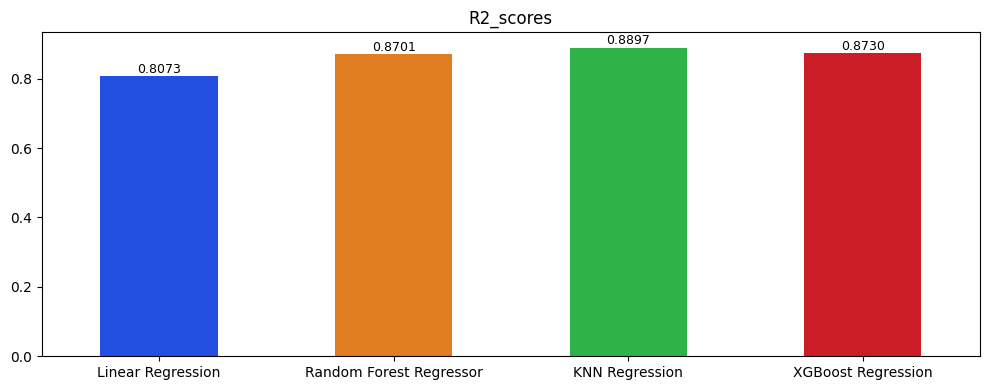

In [ ]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=algorithms, y=R2_scores,width=0.5,palette='bright')
plt.title('R2_scores')
plt.xticks()

# Add labels to the top of each bar
for index, value in enumerate(R2_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

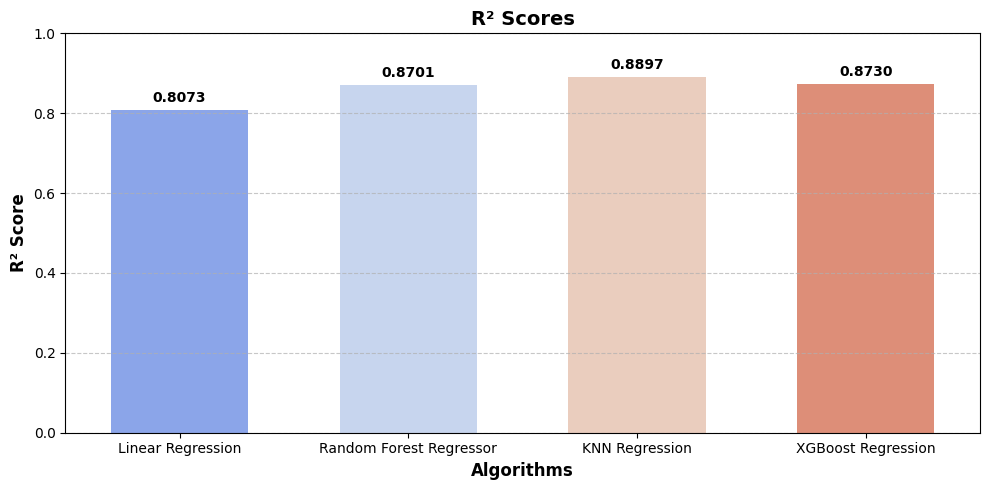

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar plot with enhancements
bar_plot = sns.barplot(x=algorithms, y=R2_scores, width=0.6, palette="coolwarm")

# Title & Labels Styling
plt.title('R² Scores', fontsize=14, fontweight='bold')
plt.xlabel("Algorithms", fontsize=12, fontweight='bold')
plt.ylabel("R² Score", fontsize=12, fontweight='bold')

# Set Y-axis range
plt.ylim(0, 1)

# Adjust X-axis labels (straightened)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of each bar
for index, value in enumerate(R2_scores):
    bar_plot.text(index, value + 0.02, f'{value:.4f}', ha='center', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


#### Even after performing hyperparameter tuning on KNN,Random Forest, and XGBoost, XGBoost still achieves higher accuracy.¶


### Model Comparison Report:

**Random Forest Regressor Model:**  
* R2 Squrae          : 0.8773
* Adjusted R2 Square : 0.6216
* Random Forests are an ensemble method known for handling complex relationships and reducing overfitting.  

**K Nearest Neighbors Regressor Model:**  
* R2 Squrae          : 0.8730
* Adjusted R2 Square : 0.6084
* KNN is able to handle  the non-linear relationships in data without making strong assumptions.  

**XGBoost Regressor:**  
* R2 Squrae          : 0.8937
* Adjusted R2 Square : 0.6723
* XGBoost is a powerful boosting algorithm known for its efficiency and performance.

### Result:
* XGBoost is the best choice because it has the highest R² and Adjusted R², meaning it generalizes well to unseen data.
* KNN is a reasonable alternative but may require fine-tuning and proper feature scaling.
* Random Forest is decent but underperforms compared to XGBoost.
* Linear Regression is not ideal for this dataset due to lower performance.

#### Among various models XGBoost stand out as the most suitable models for this dataset.

### Challenges Faced:  
**Challenge:** 
1. Data Preprocessing Issues
2. Hyperparameter Tuning Complexity
3. Handling Non-Linearity in Data	

**Solution:** 
1. Handled missing values, standardized numerical features, and encoded categorical variables properly. Used One-Hot Encoding for categorical data and MinMax Scaling/Standardization for models that require it (e.g., KNN).
2. Applied GridSearchCV to efficiently find the best parameters for Random Forest, KNN, and XGBoost, reducing manual effort.
3. Linear Regression struggled due to non-linearity, so we used tree-based models (Random Forest, XGBoost) which naturally handle non-linear patterns. KNN also helped but needed feature scaling.


The biggest challenge was balancing model performance vs. computational efficiency, and XGBoost emerged as the best solution despite its complexity. 